# Applied Data Science Capstone  
#### Applied Data Science Capstone by IBM/Coursera.  
> *Notebook Created by* **Ezra Witt**
<br>
>> *To learn more about this project or the IBM Data Science Professional Certificate visit this [website](https://www.coursera.org/professional-certificates/ibm-data-science)*

# **_Chicago Community Area Project:_**
Picture provided by Peter Fitzgerald, [Chicago community areas map](https://commons.wikimedia.org/wiki/File:Chicago_community_areas_map.svg), CC BY-SA 3.0 <br>
![Chicago Map Picture](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/Chicago_community_areas_map.svg/834px-Chicago_community_areas_map.svg.png "Chicago Map")



## **Project table of contents**
* #### [Introduction: Business Problem](#introduction)
* #### [Data Section](#data)
* #### [Methodology](#methodology)
* #### [Analysis](#analysis)
* #### [Results and Discussion](#results)
* #### [Conclusion](#conclusion)

## 
#### Week 1 Requirements

In [1]:
import pandas as pd # library for data analysis
import numpy as np # library to handle data in a vectorized manner
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


***
<a id="intro"> </a>

# `1. Introduction to the Business Problem`

## 1.1 **_Background_**
Many people hate moving and even find it stressful. This is unfortunate because **moving seems to be inevitable**. In fact, the US Census Bureau states **_the average American moves 11.7 times in their lifetime_** ([Calculating Migration Expectancy Using ACS Data](https://www.census.gov/topics/population/migration/guidance/calculating-migration-expectancy.html)). ___That is a lot of moving!___ The annual percentage of Americans who move is 11.2% ([American Moving & Storage Association](https://www.moving.org/newsroom/data-research/about-our-industry/)). 

One reason people don't enjoy moving is likely due to the cost associated with it. <br>
<br>**_How much does moving cost?_**
1. Average cost for an interstate move is **_4,100 dollars_**
2. Average cost for an in-state move is **_980 dollars_**
3. Each local mover hired charges, on average, **_25 dollars per hour_**.<br>
*([Based on moveBuddha's Moving Cost Calculator](https://www.movebuddha.com/moving-cost-calculator/))*

## 1.2 **_Problem_**
While we may not be able to completely avoid moving, we may be able to limit the times we move by **moving smarter**. Many movers stay in the same state and tend to not go very far at all, 40.2% of all movers relocated less than 50 miles from their old home to their new one
([Mover’s Remorse](https://porch.com/resource/movers-remorse)). It is my assumption that many of these people moving are realizing the neighborhood/area they were in was not ideal and they desire some change in location and/or access to local venues. 

The problem I intend to address through this data analysis is to eliminate some of the reasons people tend to relocate to help people **move smarter**. The US Census question from 2015-2016 surveyed Americans as to why they moved ([US Census Questionnaire](https://www.census.gov/topics/population/migration/guidance/calculating-migration-expectancy.html)), I will build upon their research to provide a model to help prospective moving families choose a neighborhood/area that will meet their desires/needs to ensure greater longevity in their new house. 

For this model these are the concerns listed in the US Census Questionnaire I will attempt to curve/address: <br>
- Wanted new or better home/apartment — 17.4% <br>
- New job or transfer — 10.8% <br>
- Other family reason — 10.5% <br>
- Wanted to own a home, not rent — 5.9% <br>
- Wanted better area/less crime — 3.1% <br>

In order to give the model more purpose I will create a family profile with desires for their new home to better tailor the results to address the above listed concerns. The family I am profiling is a family of four with two young children. There preferences in a new home are listed in the table below.
<br>

   | Family Profile    | Desires/Wants    |
   | :---------------- |:----------------:|
   | 1st Preference    | Family-Friendly  |
   | 2nd Preference    | Safe / Low Crime |
   | 3rd Preference    | Good Schools     |
   | Desired City      | Chicago          |

## 1.3 **_Interest_**
I think that this model will have a lot of interest from the masses, with such a high number of people often moving it could address a common problem people face. My goal is to address several of the concerns above by creating a model that allows for **moving smarter**. This will help to limit those who have chosen to move because they *wanted new or better home/apartment 17.4%*, *other family reason 10.5%*, *wanted to own a home, not rent*, and/or *wanted a better area/less crime 3.1%*. While none of those reasons can be completely eliminated, especially with change over time, a better way of finding a great place to live may alleviate the need to move so often. 

According to the survey 10.8% of people said they **moved due to a new job or transfer**, however, the [American Moving & Storage Association](https://www.moving.org/newsroom/data-research/about-our-industry/) states that number is closer to 38% of those who move. This leads me to believe there may be interest from these corporations because if they can help in the relocation process and better ensure their relocated employees settle in, it allows the employee to focus with higher morale on the profession.

Lastly, I believe this could be **a good tool for real estate agents and companies** because the ability to give more personalized suggestions to prospective buyers may allow for quicker closings and greater customer relationships.

***
<a id="data"> </a>

# `2. Data Overview`

Based on definition of our problem, *factors that will influence our decision are*:
* #### The number of family friendly venues in the community (defined below)
* #### The number of crime incidents in the community
* #### The top rated schools in the community

## 2.1 **_Data Requirements_**
To consider the problem and address the concerns the family gave in their profile I used the following data.
<br>
- #### Community Areas in Chicago from the [Chicago Data Portal](https://data.cityofchicago.org/api/geospatial/cauq-8yn6?method=export&format=GeoJSON) in order to get the preliminary information on the areas of Chicago.
- #### Spatial Data of each community area from the [Chicago Data Portal](https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Neighborhoods/bbvz-uum9).
- #### The Foursquare API to get family-friendly venues of each neighborhood.
- #### A crime report from the [Chicago Data Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2019/w98m-zvie).
- #### School Progress Reports from the [Chicago Data Portal](https://data.cityofchicago.org/Education/Chicago-Public-Schools-School-Progress-Reports-SY1/dw27-rash).

## 2.2 _**Data Collections**_
Describe the data that you will be using to solve the problem or execute your idea. Remember that you will need to use the Foursquare location data to solve the problem or execute your idea. You can absolutely use other datasets in combination with the Foursquare location data. So make sure that you provide adequate explanation and discussion, with examples, of the data that you will be using, even if it is only Foursquare location data.

- The first data I pulled was the Chicago Crime Incidents from 2019. The dataset was available on the Chicago Data Portal. Upon reviewing the dataset I found it contains 259,115 rows and 30 columns, I will use this data to group by neighborhood to determine what neighborhoods have large numbers of incidents and what neighborhoods have a low number of incidents. 

> Chicago Crime Header: ![Chicago Crime Database](https://github.com/ezrawitt/Projects/blob/master/Chicago_Crimes.png?raw=true "Crime Database")

***

***
- The next data I pulled was the Chicago School Progress Reports from 2019. The dataset was available on the Chicago Data Portal. Upon reviewing the dataset I found it contains 654 rows and 182 columns, I will use this data to group by neighborhood to determine how many highly rated schools each neighborhood contains. 

> Chicago Schools Progress Reports Header: ![Chicago School Progress Reports Dataset](https://github.com/ezrawitt/Projects/blob/master/Chicago_Schools.png?raw=true "Chicago Schools")

***

***

- The next data I pulled was the Chicago neighborhoods geospatial data. The data was available on the Chicago Data Portal. I will use this data to create the boundaries and determine the best neighborhoods for our prospective family. 

> Chicago Neighborhoods Header: ![Neighborhoods Dataset](https://github.com/ezrawitt/Projects/blob/master/Chicago_Neighborhoods.png?raw=true "Chicago Neighborhoods")

***

***

- The next data I pulled was the Chicago School Profiles Data. The dataset was available on the Chicago Data Portal. Upon reviewing the dataset I found it contains 654 rows and 95 columns, I will use this data to gather information on each school that is not included in the school progress reports. 

> School Profiles Header: ![School Profiles Dataset](https://github.com/ezrawitt/Projects/blob/master/School_Profiles.png?raw=true "School Profiles")

***

***

- The next data I pulled was using the Foursquare location data. I started by finding the venues with a limit of 100 within a mile radius (1609 meters), next I will define family-friendly venues and cluster based on neighborhoods.

> Foursquare Chicago Venues Map: ![Chicago Venues Map](https://github.com/ezrawitt/Projects/blob/master/Chicago_Venues.png?raw=true "Chicago Venues")

***

## 2.3 _**Preparing for the Data**_

#### Start with preparing Libraries and importing data tools needed for the project

In [2]:
import requests # library to handle requests
%load_ext sql
!pip install sodapy #library for handling json files

#modules for handling geospatial data
!conda install -c conda-forge geocoder --yes
import geocoder 
import shapefile as shp
!pip install geopandas
import geopandas # geopandas for advanced geojson handling
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
 
#matplotlib for handling basic graphing and charts
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.patches as mpatches # needed for waffle Charts
mpl.style.use('ggplot') # optional: for ggplot-like style

# basic http operations
import requests

# basic computing and data wrangling
import pandas as pd
import numpy as np
import json

# visualizing geo data
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from folium import plugins


# interactions with the host system 
import os
import time

#analysis and metrics
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier
# import k-means from clustering stage
from sklearn.cluster import KMeans
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

print('Libraries Ready.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    click-7.1.2                |     pyh9f0ad1d_0          64 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    future-0.18.2              |   py36h9f0ad1d_1         714 KB  conda-forge
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    pysocks-1.7.1              |   py36h9f0ad1d_1          27 KB  conda-forge
    r

## 2.4 **_Creating the Dataframes_**

- #### **Chicago Community Areas - GeoJSON**

In [3]:
Chicago_gpd = geopandas.read_file("https://data.cityofchicago.org/api/geospatial/cauq-8yn6?method=export&format=GeoJSON")

##### Now that it's imported we can view and explore the first five rows and the shape of our data

In [4]:
print(Chicago_gpd.shape)
Chicago_gpd.head()

(77, 10)


,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."


- #### **Chicago Public Schools - School Progress Reports SY1819**

In [5]:
#this data contains several ratings and zipcodes
School_Progress = pd.read_csv("https://data.cityofchicago.org/resource/dw27-rash.csv")

##### Now that it's imported we can view and explore the first five rows and the shape of our data

In [6]:
print("The Shape of the Dataframe is", School_Progress.shape)
School_Progress.head()

The Shape of the Dataframe is (654, 182)


,school_id,short_name,long_name,school_type,primary_category,address,city,state,zip,phone,...,attainment_sat_grade_11_school,attainment_sat_grade_11_school_1,attainment_all_grades_school,attainment_all_grades_school_1,growth_psat_math_grade_10,growth_psat_math_grade_10_1,growth_sat_reading_grade,growth_sat_reading_grade_1,growth_sat_math_grade_11,growth_sat_math_grade_11_1
0,609869,LANGFORD,Anna R. Langford Community Academy,Neighborhood,ES,6010 S THROOP ST,Chicago,Illinois,60636,7.735359e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,610225,WHISTLER,John Whistler Elementary School,Neighborhood,ES,11533 S ADA ST,Chicago,Illinois,60643,7.735356e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,609734,TAFT HS,William Howard Taft High School,Neighborhood,HS,6530 W BRYN MAWR AVE,Chicago,Illinois,60631,7.735341e+09,...,45.6,45.6,56.4,56.4,28.0,28th,50.0,50th,34.0,34th
3,610588,RICHARDSON,Robert J. Richardson Middle School,Neighborhood,MS,6018 S KARLOV,Chicago,Illinois,60629,7.735359e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,609894,DRAKE,John B Drake Elementary School,Neighborhood,ES,2710 S DEARBORN ST,Chicago,Illinois,60616,7.735349e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- #### **Chicago Public Schools - School Profile Information SY1819**

In [7]:
## This file contains both Lat and Long and School Rating
## There are several usable rows:
    ## School_Latitude
    ## School_Longitude
    ## Rating_Status
    ## Rating_Statement
School_Profiles = pd.read_csv("https://data.cityofchicago.org/resource/kh4r-387c.csv")

##### Now that it's imported we can view and explore the first five rows and the shape of our data

In [8]:
print("The Shape of the Dataframe is", School_Profiles.shape)
School_Profiles.head()

The Shape of the Dataframe is (654, 95)


,school_id,legacy_unit_id,finance_id,short_name,long_name,primary_category,is_high_school,is_middle_school,is_elementary_school,is_pre_school,...,sixth_contact_name,seventh_contact_title,seventh_contact_name,network,is_gocps_participant,is_gocps_prek,is_gocps_elementary,is_gocps_high_school,open_for_enrollment_date,closed_for_enrollment_date
0,610191,6070,29291,STONE,Stone Elementary Scholastic Academy,ES,False,True,True,False,...,NaN,NaN,NaN,Network 2,True,False,True,False,2004-09-01T00:00:00.000,NaN
1,609966,3750,23531,HAMMOND,Charles G Hammond Elementary School,ES,False,True,True,True,...,NaN,NaN,NaN,Network 7,True,False,True,False,2004-09-01T00:00:00.000,NaN
2,400069,4150,67081,POLARIS,Polaris Charter Academy,ES,False,True,True,False,...,NaN,NaN,NaN,Charter,False,False,False,False,2007-07-01T00:00:00.000,NaN
3,400173,9648,66801,PATHWAYS - BRIGHTON PARK HS,Pathways in Education- Brighton Park,HS,True,False,False,False,...,NaN,NaN,NaN,Options,False,False,False,False,2014-07-01T00:00:00.000,NaN
4,400057,1936,66147,NOBLE - UIC HS,Noble - UIC College Prep,HS,True,False,False,False,...,Jacqueline Arroyo,Dean of College,Megan Camacho,Charter,True,False,False,True,2008-07-01T00:00:00.000,NaN


- #### **Chicago Zip Codes**

In [9]:
Zip_codes = pd.read_json("https://data.cityofchicago.org/resource/unjd-c2ca.json")
merge = Zip_codes[['objectid', 'zip']].copy()

#### Since the school data doesn't contain community areas we will create a dataframe to merge/connect community area numbers, zip codes, and names of community areas

In [10]:
print("The Shape of the Dataframe is", merge.shape)
merge.head()

The Shape of the Dataframe is (61, 2)


,objectid,zip
0,33,60647
1,34,60639
2,35,60707
3,36,60622
4,37,60651


- #### **Chicago Crimes - 2019**

In [11]:
Chicago_Crime = pd.read_json("https://data.cityofchicago.org/resource/w98m-zvie.json?$limit=260000")

In [12]:
Chicago_Crime.columns.values #check for usable / meaningful columns

array([':@computed_region_d9mm_jgwp', ':@computed_region_43wa_7qmu',
       'date', 'location', 'district', 'y_coordinate', 'block',
       ':@computed_region_rpca_8um6', 'latitude',
       ':@computed_region_awaf_s7ux', 'description',
       'location_description', 'community_area', 'updated_on', 'iucr',
       'x_coordinate', 'ward', 'year', 'case_number', 'fbi_code',
       'domestic', 'longitude', ':@computed_region_bdys_3d7i', 'beat',
       ':@computed_region_6mkv_f3dw', 'arrest', 'primary_type',
       ':@computed_region_vrxf_vc4k', 'id', ':@computed_region_d3ds_rm58'],
      dtype=object)

In [13]:
Chicago_Crime['incidents'] = 1 ###create a way of totaling the number of crimes later
print("The Shape of the Dataframe is", Chicago_Crime.shape)
Chicago_Crime.head()

The Shape of the Dataframe is (259146, 31)


,:@computed_region_d9mm_jgwp,:@computed_region_43wa_7qmu,date,location,district,y_coordinate,block,:@computed_region_rpca_8um6,latitude,:@computed_region_awaf_s7ux,...,longitude,:@computed_region_bdys_3d7i,beat,:@computed_region_6mkv_f3dw,arrest,primary_type,:@computed_region_vrxf_vc4k,id,:@computed_region_d3ds_rm58,incidents
0,17.0,32.0,2019-12-31 23:55:00,"{'latitude': '41.769150218', 'human_address': ...",7,1859260.0,0000X W 69TH ST,11.0,41.769150,31.0,...,-87.627137,513.0,731,21559.0,True,WEAPONS VIOLATION,67.0,11938228,201.0,1
1,17.0,2.0,2019-12-31 23:54:00,"{'latitude': '41.779173667', 'human_address': ...",7,1862855.0,063XX S MAY ST,11.0,41.779174,19.0,...,-87.653278,436.0,724,21559.0,False,BATTERY,66.0,11940078,203.0,1
2,NaN,NaN,2019-12-31 23:50:00,NaN,12,NaN,004XX N Ashland ave,NaN,NaN,NaN,...,NaN,NaN,1215,NaN,False,THEFT,NaN,11938857,NaN,1
3,25.0,7.0,2019-12-31 23:48:00,"{'latitude': '41.874623951', 'human_address': ...",15,1897452.0,004XX S CICERO AVE,32.0,41.874624,36.0,...,-87.745053,69.0,1533,22216.0,True,WEAPONS VIOLATION,26.0,11938240,137.0,1
4,16.0,23.0,2019-12-31 23:46:00,"{'latitude': '41.877268465', 'human_address': ...",11,1898480.0,034XX W JACKSON BLVD,30.0,41.877268,11.0,...,-87.711537,783.0,1133,21572.0,False,WEAPONS VIOLATION,28.0,11937967,86.0,1


- #### **Chicago Boundaries - Neighborhoods and Community Areas**

In [14]:
### Neighborhoods
### https://data.cityofchicago.org/resource/y6yq-dbs2.json
Chicago_Neighborhoods = pd.read_json("https://data.cityofchicago.org/resource/y6yq-dbs2.json")
print("The Shape of the Dataframe is", Chicago_Neighborhoods.shape)
Chicago_Neighborhoods.head()

The Shape of the Dataframe is (98, 5)


,the_geom,pri_neigh,sec_neigh,shape_area,shape_len
0,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",Grand Boulevard,BRONZEVILLE,4.849250e+07,28196.837157
1,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",Printers Row,PRINTERS ROW,2.162138e+06,6864.247156
2,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",United Center,UNITED CENTER,3.252051e+07,23101.363745
3,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",Sheffield & DePaul,SHEFFIELD & DEPAUL,1.048259e+07,13227.049745
4,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",Humboldt Park,HUMBOLDT PARK,1.250104e+08,46126.751351


In [15]:
### Community Areas
## "https://data.cityofchicago.org/resource/igwz-8jzy.json"
Chicago_Community_Areas = pd.read_json("https://data.cityofchicago.org/resource/igwz-8jzy.json")
print("The Shape of the Dataframe is", Chicago_Community_Areas.shape)
Chicago_Community_Areas.head()

The Shape of the Dataframe is (77, 10)


,the_geom,perimeter,area,comarea,comarea_id,area_numbe,community,area_num_1,shape_area,shape_len
0,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",0,0,0,0,35,DOUGLAS,35,4.600462e+07,31027.054510
1,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",0,0,0,0,36,OAKLAND,36,1.691396e+07,19565.506153
2,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",0,0,0,0,37,FULLER PARK,37,1.991670e+07,25339.089750
3,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",0,0,0,0,38,GRAND BOULEVARD,38,4.849250e+07,28196.837157
4,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",0,0,0,0,39,KENWOOD,39,2.907174e+07,23325.167906


- #### **Merge Dataframe - Connecting values**

#### Since some of the dataframes I will be using have a variety of identifiers so I will use this dataframe to fill in missing values as needed. <br>
##### Using the Chicago Community Areas Dataframe we are able to take the community names and community ID numbers

In [16]:
### use community matched with community area numbers to create the missing dataset
Continuity = Chicago_Community_Areas[['community', 'area_num_1']].copy()
Continuity = Continuity.rename(columns={'area_num_1':'objectid'})
Continuity.head()

,community,objectid
0,DOUGLAS,35
1,OAKLAND,36
2,FULLER PARK,37
3,GRAND BOULEVARD,38
4,KENWOOD,39


##### Next we will add the zip codes we created earlier to the community and object IDs we just created

In [17]:
### create the full dataset to fill in missing pieces for other datasets
JOIN = Continuity.set_index('objectid').join(merge.set_index('objectid')).reset_index()
JOIN.head()

,objectid,community,zip
0,35,DOUGLAS,60707.0
1,36,OAKLAND,60622.0
2,37,FULLER PARK,60651.0
3,38,GRAND BOULEVARD,60611.0
4,39,KENWOOD,60638.0


##### Next we can check if there are any rows that are missing information

In [18]:
JOIN.isnull()

,objectid,community,zip
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
72,False,False,True
73,False,False,True
74,False,False,True
75,False,False,True


##### Next we will use the dataframe moving forward but I may come back and drow the missing rows if needed later

In [19]:
# simply drop whole row with NaN in "zip code" because no schools showed in those areas
# JOIN.dropna(subset=["zip"], axis=0, inplace=True)

# reset index, because we droped rows
# JOIN.reset_index(drop=True, inplace=True)
# JOIN.zip = JOIN.zip.astype(int)
# JOIN.shape

- #### **Foursquare ID Credentials**

#### For the Foursquare API we will enter our credentials in a hidden cell and store them in variables moving forward

In [20]:
# @hidden_cell
CLIENT_ID = 'UBLIN1MEZ22RBQI1RFZVWXQPNQOW0KONNQXT2WP2LJCDILJG' # your Foursquare ID
CLIENT_SECRET = 'IY51ILYZFFZPROEQCFSRGIM5NAFYSIWOOYH5MJYL5TFK2AKB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

LIMIT = 100
radius = 500

print('Your credentails have been stored')

Your credentails have been stored


## 2.5 *__Clean dataframes to relevant data__*

#### Now that we have created the dataframes we will now clean the dataframes to the relevant information

- #### **Chicago Public Schools - School Progress Reports SY1819**

In [21]:
School_Progress.shape

(654, 182)

##### This dataframe has 182 columns so we will clean and narrow it down to just the columns needed for the scope of our project

In [22]:
School_Progress_S = School_Progress[['long_name', 'zip', 'student_growth_rating', 'student_attainment_rating', 'school_survey_safety', 'state_school_report_card', 'school_latitude', 'school_longitude']]
School_Progress_S.set_index('long_name', inplace=True)
School_Progress_S.head()

,zip,student_growth_rating,student_attainment_rating,school_survey_safety,state_school_report_card,school_latitude,school_longitude
long_name,,,,,,,
Anna R. Langford Community Academy,60636,AVERAGE,FAR BELOW AVERAGE,VERY WEAK,http://iirc.niu.edu/School.aspx?schoolid=15016...,41.784681,-87.657169
John Whistler Elementary School,60643,BELOW AVERAGE,ABOVE AVERAGE,NEUTRAL,http://iirc.niu.edu/School.aspx?schoolid=15016...,41.683907,-87.655384
William Howard Taft High School,60631,AVERAGE,MET EXPECTATIONS,WEAK,http://iirc.niu.edu/School.aspx?schoolid=15016...,41.982961,-87.791547
Robert J. Richardson Middle School,60629,AVERAGE,AVERAGE,VERY WEAK,http://iirc.niu.edu/School.aspx?schoolid=15016...,41.783826,-87.725422
John B Drake Elementary School,60616,ABOVE AVERAGE,BELOW AVERAGE,STRONG,http://iirc.niu.edu/School.aspx?schoolid=15016...,41.844043,-87.628553


- #### **Chicago Public Schools - School Profile Information SY1819**

In [23]:
School_Profiles.shape

(654, 95)

##### This dataframe has 95 columns so we will clean and narrow it down to just the columns needed for the scope of our project

In [24]:
School_Profiles_S = School_Profiles[['long_name', 'school_latitude', 'school_longitude', 'overall_rating', 'rating_status', 'zip']]
School_Profiles_S.head()

,long_name,school_latitude,school_longitude,overall_rating,rating_status,zip
0,Stone Elementary Scholastic Academy,41.995359,-87.684793,Level 1+,GOOD STANDING,60659
1,Charles G Hammond Elementary School,41.852719,-87.696243,Level 1,GOOD STANDING,60623
2,Polaris Charter Academy,41.892550,-87.707796,Level 2,NOT APPLICABLE,60624
3,Pathways in Education- Brighton Park,41.808226,-87.702645,Level 2+,NOT APPLICABLE,60632
4,Noble - UIC College Prep,41.865817,-87.676111,Level 1+,NOT APPLICABLE,60608


##### Since the School Profiles have zip codes but no other indicators we will join the dataframe we created earlier to add the community names and community IDs

In [25]:
Add_2_RCA = School_Profiles_S.set_index('zip').join(JOIN.set_index('zip')).reset_index()
School_Profiles_S = School_Profiles_S.set_index('zip').join(JOIN.set_index('zip')).reset_index()
School_Profiles_S.head()

,zip,long_name,school_latitude,school_longitude,overall_rating,rating_status,objectid,community
0,60602,YCCS- Innovations HS of Arts Integration,41.883047,-87.627734,Level 2+,NOT APPLICABLE,26,WEST GARFIELD PARK
1,60602,Noble - Muchin College Prep,41.882740,-87.626338,Level 1+,NOT APPLICABLE,26,WEST GARFIELD PARK
2,60605,William Jones College Preparatory High School,41.873066,-87.627675,Level 1+,GOOD STANDING,20,HERMOSA
3,60607,Chicago Virtual Charter School,41.880550,-87.649772,Level 2,NOT APPLICABLE,29,NORTH LAWNDALE
4,60607,Mark Skinner Elementary School,41.879103,-87.659419,Level 1+,GOOD STANDING,29,NORTH LAWNDALE


- #### **Chicago Crimes - 2019**

In [26]:
Chicago_Crime.shape

(259146, 31)

##### Since this is a very large dataframe (259,142 rows) we will start by dropping rows that are not readily usable for our project. Since we want to be able to view each incident as part of a community and map them we will drop any rows that do not have an assigned latitude or longitude.

In [27]:
# simply drop whole row with NaN in "latitude" & "longitude" column since we won't be able to use this data
Chicago_Crime.dropna(subset=["latitude"], axis=0, inplace=True)
Chicago_Crime.dropna(subset=["longitude"], axis=0, inplace=True)

# reset index, because we droped rows
Chicago_Crime.reset_index(drop=True, inplace=True)

In [28]:
Chicago_Crime.shape

(257989, 31)

##### After dropping those without latitude and longitude (1,152 rows) we are still left with a good amount of data to use for our project (257990 incidents). We can now narrow down the 31 columns and view the first five rows.

In [29]:
Chicago_Crime_S = Chicago_Crime[['block', 'primary_type', 'description', 'location_description', 'community_area', 'arrest', 'latitude', 'longitude', 'location', 'incidents']]
Chicago_Crime_S.head()

,block,primary_type,description,location_description,community_area,arrest,latitude,longitude,location,incidents
0,0000X W 69TH ST,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,69,True,41.769150,-87.627137,"{'latitude': '41.769150218', 'human_address': ...",1
1,063XX S MAY ST,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,68,False,41.779174,-87.653278,"{'latitude': '41.779173667', 'human_address': ...",1
2,004XX S CICERO AVE,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,VEHICLE NON-COMMERCIAL,25,True,41.874624,-87.745053,"{'latitude': '41.874623951', 'human_address': ...",1
3,034XX W JACKSON BLVD,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,27,False,41.877268,-87.711537,"{'latitude': '41.877268465', 'human_address': ...",1
4,012XX W 99TH ST,OTHER OFFENSE,GUN OFFENDER: DUTY TO REPORT CHANGE OF INFORMA...,STREET,73,True,41.714095,-87.652807,"{'latitude': '41.714095115', 'human_address': ...",1


***
<a id="methodology"> </a>

# `3. Methodology`

***

## 3.1 *__Initial Steps__*

In this project my goal is to find **the best possible community areas for a profiled family**. More specifically, _**a community area with low crime, top rated schools, and family friendly venues**_ for our family to enjoy. <br>

In the data section, we *retrieved the needed data* from their respected sources and created the dataframes.<br>

Once we had collected the preliminary data we then *cleaned the dataframes* and format the information in a way we can analyze and begin to solve our problem <br>

## 3.2 *__Next Steps__*

Next, we will **analyze and narrow down the community areas** to the ideal locations for our family based on the preferences of what our family is looking for in a new community.
<br>
Since the family wanted to find a community area that **has low crime, top rated schools, and family friendly venues** we will seek to identify those which are highly rated in these categories. <br>

We will start by exploring our community boundaries. After we have found the defining borders we can begin working through each of our requirements and eliminate communities that do not match that criteria. i.e. *__those with high crimes, low rated schools, and a lack of family friendly venues__*.

In the **final step** we will focus on narrowing down the communities to the ones that meet all of the requirements we set out for at the beginning of the project and make recommendations of suitable communities for our family.

***
<a id="analysis"> </a>

# `4. Analysis`

***

## 4.1 **_Chicago Community Areas_**

- #### Using the geolocator we will create latitude and longitude variables of Chicago for our project. 

In [30]:
address = 'Chicago'

geolocator = Nominatim(user_agent="ILL_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chicago are 41.8755616, -87.6244212.


- #### The first step in the analysis process is to define and locate each of the community areas. Identifying these areas would then give us a starting point as to the list of the possible places to recommend for the family to move into.

In [31]:
### start by viewing the cleaned dataframe and the number of community areas listed
print(Chicago_Community_Areas.shape)
Chicago_Community_Areas.head()

(77, 10)


,the_geom,perimeter,area,comarea,comarea_id,area_numbe,community,area_num_1,shape_area,shape_len
0,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",0,0,0,0,35,DOUGLAS,35,4.600462e+07,31027.054510
1,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",0,0,0,0,36,OAKLAND,36,1.691396e+07,19565.506153
2,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",0,0,0,0,37,FULLER PARK,37,1.991670e+07,25339.089750
3,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",0,0,0,0,38,GRAND BOULEVARD,38,4.849250e+07,28196.837157
4,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",0,0,0,0,39,KENWOOD,39,2.907174e+07,23325.167906


- #### Since the dataset has a lens/area of longitude and latitude I will join this data set with the crime data set and then find the average longitude and latitude for each community area. In order to be able to place a marker on each of the community areas on top of the geojson

In [32]:
combined_areas = pd.merge(left=Chicago_Crime, right=Chicago_Community_Areas, how='outer', left_on='community_area', right_on='area_numbe')

In [33]:
combined_areas = combined_areas[['community_area','community', 'latitude', 'longitude']]
print(combined_areas.shape)
combined_areas.head()

(257989, 4)


,community_area,community,latitude,longitude
0,69,GREATER GRAND CROSSING,41.769150,-87.627137
1,69,GREATER GRAND CROSSING,41.770900,-87.627935
2,69,GREATER GRAND CROSSING,41.765163,-87.624897
3,69,GREATER GRAND CROSSING,41.765163,-87.624897
4,69,GREATER GRAND CROSSING,41.757660,-87.612657


In [34]:
Community_Areas = combined_areas.groupby(['community'],as_index = False).agg({'latitude':'mean','longitude':'mean'})

- #### Now that we have the average we can make sure we have the original 77 community areas with their longitude and latitude listed

In [35]:
print(Community_Areas.shape)
Community_Areas.head()

(77, 3)


,community,latitude,longitude
0,ALBANY PARK,41.966980,-87.719034
1,ARCHER HEIGHTS,41.807188,-87.726875
2,ARMOUR SQUARE,41.842066,-87.633271
3,ASHBURN,41.745978,-87.710200
4,AUBURN GRESHAM,41.746322,-87.655224


- ### Now we can visualize each community area on top of the geojson file

In [36]:
community_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# instantiate a feature group for the community areas in the dataframe
communityarea = folium.map.FeatureGroup()

# loop through the 77 community areas and add each to the feature group
for lat, lng, in zip(Community_Areas.latitude, Community_Areas.longitude):
    communityarea.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(Community_Areas.latitude)
longitudes = list(Community_Areas.longitude)
labels = list(Community_Areas.community)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(community_map) 

folium.GeoJson(
    Chicago_gpd,
    name='geojson'
).add_to(community_map)
    
# add incidents to map
#community_map.add_child(communityarea)

***

Chicago Community Areas: <br>
![Chicago Community Areas](https://github.com/ezrawitt/Coursera_Capstone/blob/master/images/Community%20Areas.png?raw=true "Chicago Community Areas")

***

- #### Now we will create a dataframe of our community areas sorted by community ID numbers to use in this project

In [37]:
Recommended_Community_Areas = Chicago_Community_Areas[['area_num_1', 'area_numbe', 'community']]

Recommended_Community_Areas = Recommended_Community_Areas.rename(columns={'area_num_1':'community ID'})

Recommended_Community_Areas = Recommended_Community_Areas.sort_values('community ID')

Recommended_Community_Areas.set_index('community ID', inplace=True)

Recommended_Community_Areas.head()

,area_numbe,community
community ID,,
1,1,ROGERS PARK
2,2,WEST RIDGE
3,3,UPTOWN
4,4,LINCOLN SQUARE
5,5,NORTH CENTER


- #### We will now use this dataframe to add the preferences of our family and narrow down the community areas to the recommended results

## 4.2 **_Chicago Public Schools_**

- #### The first thing we will explore is the Chicago Public Schools. Chicago rates each of there schools so we will explore those ratings and narrow the results to the top schools and map by community areas.

In [38]:
#First let's look at the first five rows of the dataframe
School_Profiles_S.head()

,zip,long_name,school_latitude,school_longitude,overall_rating,rating_status,objectid,community
0,60602,YCCS- Innovations HS of Arts Integration,41.883047,-87.627734,Level 2+,NOT APPLICABLE,26,WEST GARFIELD PARK
1,60602,Noble - Muchin College Prep,41.882740,-87.626338,Level 1+,NOT APPLICABLE,26,WEST GARFIELD PARK
2,60605,William Jones College Preparatory High School,41.873066,-87.627675,Level 1+,GOOD STANDING,20,HERMOSA
3,60607,Chicago Virtual Charter School,41.880550,-87.649772,Level 2,NOT APPLICABLE,29,NORTH LAWNDALE
4,60607,Mark Skinner Elementary School,41.879103,-87.659419,Level 1+,GOOD STANDING,29,NORTH LAWNDALE


- #### Let's start by viewing how many schools rank in each category

In [39]:
Values = School_Profiles_S['overall_rating'].value_counts()
Values

Level 1              203
Level 2+             161
Level 1+             150
Level 2              133
Inability to Rate     22
Level 3                8
Name: overall_rating, dtype: int64

- #### Next we can sort the dataframe by overall ratings of each school

In [40]:
# group schools by ratings and apply sum() function 
school_percentages = School_Profiles_S.groupby('overall_rating', axis=0).count()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
school_percentages.head()

,zip,long_name,school_latitude,school_longitude,rating_status,objectid,community
overall_rating,,,,,,,
Inability to Rate,22,22,22,22,22,22,22
Level 1,203,203,203,203,203,203,203
Level 1+,150,150,150,150,150,150,150
Level 2,133,133,133,133,133,133,133
Level 2+,161,161,161,161,161,161,161


- #### Next let's explore the percentage of schools in each rating

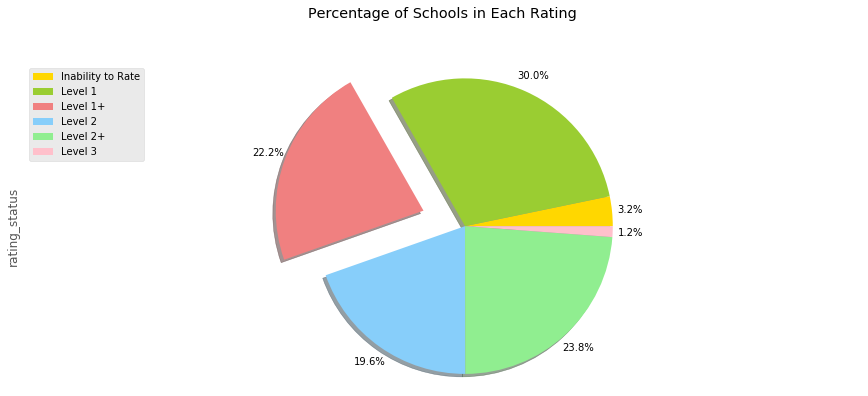

In [41]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0, 0, 0.3, 0, 0.0, 0.0] # ratio for each continent with which to offset each wedge.

school_percentages['rating_status'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=0,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode'
                            )

# scale the title up by 12% to match pctdistance
plt.title('Percentage of Schools in Each Rating', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=school_percentages.index, loc='upper left') 

#plt.show()

***

![Level 1+ Schools](https://github.com/ezrawitt/Coursera_Capstone/blob/master/images/Percentage%20of%20Schools%20in%20each%20rating.png?raw=true "Percentage of Schools in Each Category")

***

#### Next Let's Isolate just the top Level 1+ Schools

In [42]:
School_Profiles_S.set_index('overall_rating', inplace=True)
Top_Schools = School_Profiles_S.loc[['Level 1+'], 'long_name'].transpose()

In [43]:
Top_Schools.head()

overall_rating
Level 1+                      Noble - Muchin College Prep
Level 1+    William Jones College Preparatory High School
Level 1+                   Mark Skinner Elementary School
Level 1+               Whitney M Young Magnet High School
Level 1+                              STEM Magnet Academy
Name: long_name, dtype: object

In [44]:
Sorting_Schools = School_Profiles_S.sort_values(['overall_rating']).reset_index()
Level_1_Plus = Sorting_Schools[217:364]
Level_1_Plus.head()

,overall_rating,zip,long_name,school_latitude,school_longitude,rating_status,objectid,community
217,Level 1,60609,Evergreen Academy Middle School,41.829356,-87.667817,GOOD STANDING,22,LOGAN SQUARE
218,Level 1,60613,Joseph Brennemann Elementary School,41.959984,-87.649749,GOOD STANDING,53,WEST PULLMAN
219,Level 1,60609,William T Sherman Elementary School,41.799766,-87.650221,GOOD STANDING,22,LOGAN SQUARE
220,Level 1,60609,Edward Beasley Elementary Magnet Academic Center,41.798465,-87.625692,GOOD STANDING,22,LOGAN SQUARE
221,Level 1,60608,Phillip D Armour Elementary School,41.833854,-87.650653,GOOD STANDING,28,NEAR WEST SIDE


- #### Next let's see how many Level 1+ schools are in the dataset

In [45]:
Level_1_Plus.shape

(147, 8)

- #### Now that we have the 147 Top Schools let's create a visualization to see the location of each one.

In [46]:
Level_1_Plus_Map_Data = Level_1_Plus[['long_name', 'zip', 'school_latitude', 'school_longitude', 'overall_rating', 'rating_status', 'objectid']].copy()
Level_1_Plus_Map_Data['count'] =1 ### to help create clusters
Level_1_Plus_Map_Data.head()

,long_name,zip,school_latitude,school_longitude,overall_rating,rating_status,objectid,count
217,Evergreen Academy Middle School,60609,41.829356,-87.667817,Level 1,GOOD STANDING,22,1
218,Joseph Brennemann Elementary School,60613,41.959984,-87.649749,Level 1,GOOD STANDING,53,1
219,William T Sherman Elementary School,60609,41.799766,-87.650221,Level 1,GOOD STANDING,22,1
220,Edward Beasley Elementary Magnet Academic Center,60609,41.798465,-87.625692,Level 1,GOOD STANDING,22,1
221,Phillip D Armour Elementary School,60608,41.833854,-87.650653,Level 1,GOOD STANDING,28,1


In [47]:
# let's start again with a clean copy of the map of Chicago
School_Cluster_Map = folium.Map(location = [latitude, longitude], zoom_start = 11)

# instantiate a mark cluster object for the incidents in the dataframe
count = plugins.MarkerCluster().add_to(School_Cluster_Map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(Level_1_Plus_Map_Data.school_latitude, Level_1_Plus_Map_Data.school_longitude, Level_1_Plus_Map_Data.long_name):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(count)

folium.GeoJson(
    Chicago_gpd,
    name='geojson'
).add_to(School_Cluster_Map)
    
#School_Cluster_Map

***
Clusters of Level 1+ Schools
![Level 1+ School Clusters](https://github.com/ezrawitt/Coursera_Capstone/blob/master/images/School%20Level%201+%20Cluster%20Map.png?raw=true "Level 1+ Schools")

***

- #### Now that we have the top schools let's find out how many there in each community and add the number of Level 1+ schools to the DataFrame

In [48]:
Add_Ratings = Level_1_Plus_Map_Data.groupby(['objectid'],as_index = True).agg({'count': 'sum'}).reset_index()
print(Add_Ratings.shape)
Add_Ratings.head()

(46, 2)


,objectid,count
0,1,1
1,2,4
2,3,1
3,4,1
4,5,9


In [49]:
Add_Ratings = Add_Ratings.rename(columns={'objectid':'community ID'})
Add_Ratings = Add_Ratings.rename(columns={'count':'Level 1+ Schools'})
Recommended_Community_Areas = Recommended_Community_Areas.join(Add_Ratings.set_index('community ID'))

In [50]:
Recommended_Community_Areas.head(6)

,area_numbe,community,Level 1+ Schools
community ID,,,
1,1,ROGERS PARK,1.0
2,2,WEST RIDGE,4.0
3,3,UPTOWN,1.0
4,4,LINCOLN SQUARE,1.0
5,5,NORTH CENTER,9.0
6,6,LAKE VIEW,NaN


# 4.3 **_Chicago Crimes_**

In [51]:
Chicago_Crime_S.shape

(257989, 10)

- #### In this dataframe we have 257,990 incidents from the Chicago Crimes Report. Let's check if we have other missing data that will need to be dropped

In [52]:
missing_data = Chicago_Crime_S.isnull()
missing_data.head()

,block,primary_type,description,location_description,community_area,arrest,latitude,longitude,location,incidents
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [53]:
### Check missing data to ensure that all incidents include community_area, latitude, and longitude.
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

block
False    257989
Name: block, dtype: int64

primary_type
False    257989
Name: primary_type, dtype: int64

description
False    257989
Name: description, dtype: int64

location_description
False    257047
True        942
Name: location_description, dtype: int64

community_area
False    257989
Name: community_area, dtype: int64

arrest
False    257989
Name: arrest, dtype: int64

latitude
False    257989
Name: latitude, dtype: int64

longitude
False    257989
Name: longitude, dtype: int64

location
False    257989
Name: location, dtype: int64

incidents
False    257989
Name: incidents, dtype: int64



- #### From checking the list above we can see that we do not have any missing data in the three categories we need after dropping the latitude and longitude missing values earlier in the data cleaning portion of our project 

Next let's explore the number of each type of crime in the dataframe

In [54]:
Cvalues = Chicago_Crime_S['primary_type'].value_counts()
Cvalues

THEFT                                61632
BATTERY                              49469
CRIMINAL DAMAGE                      26603
ASSAULT                              20597
DECEPTIVE PRACTICE                   18030
OTHER OFFENSE                        16684
NARCOTICS                            14219
BURGLARY                              9626
MOTOR VEHICLE THEFT                   8977
ROBBERY                               7987
CRIMINAL TRESPASS                     6804
WEAPONS VIOLATION                     6325
OFFENSE INVOLVING CHILDREN            2290
INTERFERENCE WITH PUBLIC OFFICER      1545
PUBLIC PEACE VIOLATION                1518
SEX OFFENSE                           1292
CRIM SEXUAL ASSAULT                   1263
PROSTITUTION                           680
HOMICIDE                               502
ARSON                                  377
CRIMINAL SEXUAL ASSAULT                333
LIQUOR LAW VIOLATION                   230
STALKING                               222
CONCEALED C

- #### Next let's calculate, more importantly, how many crimes are located in each community

In [55]:
Crime_Group = Chicago_Crime.groupby(['community_area'],as_index = True).agg({'latitude':'mean','longitude':'mean','incidents': 'sum'}).reset_index()

In [56]:
print(Crime_Group.shape)
Crime_Group.head(10)

(77, 4)


,community_area,latitude,longitude,incidents
0,1,42.012079,-87.670498,3999
1,2,41.999692,-87.692902,3423
2,3,41.966202,-87.656995,3302
3,4,41.972514,-87.689103,1773
4,5,41.947599,-87.682797,1247
5,6,41.943110,-87.653240,5892
6,7,41.922685,-87.650289,4233
7,8,41.897292,-87.630511,12441
8,9,42.006012,-87.813457,262
9,10,41.984622,-87.802525,1148


- #### Now that we know the number of crimes in each community let's add that information to our dataframe

In [57]:
### Add Crime to Dataframe

Add_Crime = Crime_Group[['community_area', 'incidents']].copy()
Add_Crime = Add_Crime.rename(columns={'community_area':'community ID'})
Add_Crime = Add_Crime.rename(columns={'incidents':'Crime Incidents'})
Recommended_Community_Areas = Recommended_Community_Areas.join(Add_Crime.set_index('community ID'))

In [58]:
Recommended_Community_Areas.head()

,area_numbe,community,Level 1+ Schools,Crime Incidents
community ID,,,,
1,1,ROGERS PARK,1.0,3999
2,2,WEST RIDGE,4.0,3423
3,3,UPTOWN,1.0,3302
4,4,LINCOLN SQUARE,1.0,1773
5,5,NORTH CENTER,9.0,1247


- #### Now let's look at the communities with the highest and lowest crime levels

In [59]:
Ten_Data = Chicago_Crime.groupby(['community_area'],as_index = True).agg({'latitude':'mean','longitude':'mean','incidents': 'sum'})
Ten_Data.sort_values(by='incidents', ascending=True, inplace=True)
Top_10_Crime = Ten_Data['incidents'].tail(10)
Top_10_Crime

community_area
44     6762
24     7151
71     7562
23     7900
43     8626
29     8807
28     9254
32    10391
8     12441
25    14661
Name: incidents, dtype: int64

Text(0.5, 1.0, 'Highest Crime Community Areas')

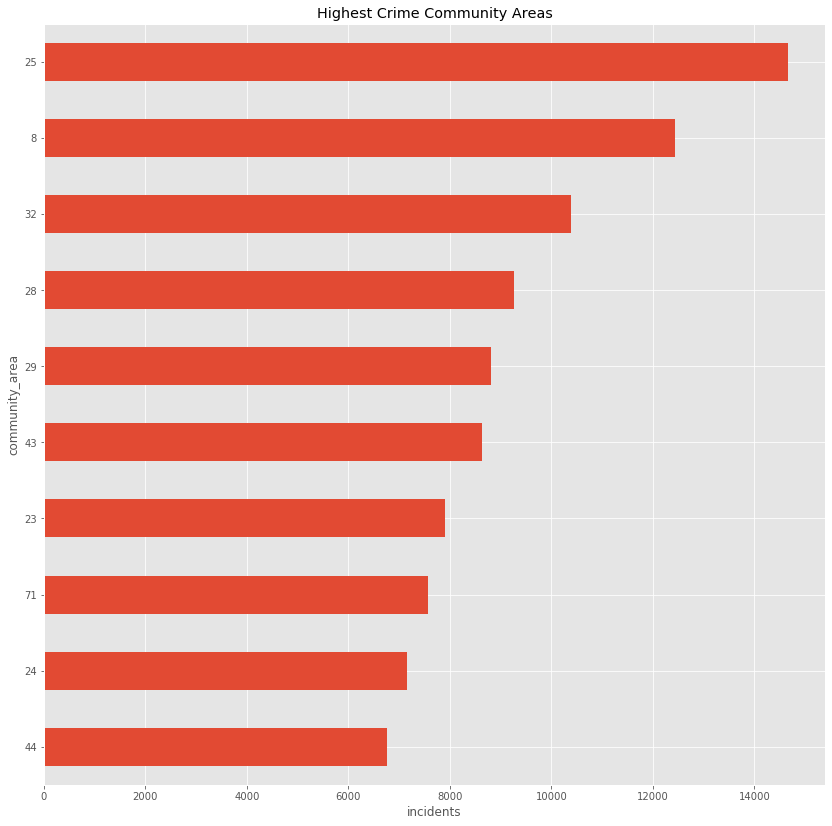

In [60]:
Top_10_Crime.plot(kind='barh', figsize=(14, 14))

plt.xlabel('incidents') # add to x-label to the plot
plt.ylabel('community_area') # add y-label to the plot
plt.title('Highest Crime Community Areas') # add title to the plot

#plt.show()

***
![Highest Crime Communities](https://github.com/ezrawitt/Coursera_Capstone/blob/master/images/Highest%20Crime%20Community%20Areas.png?raw=true "Highest Crime Communities")

***

In [61]:
### 
Ten_Data.sort_values(by='incidents', ascending=True, inplace=True)
Bottom_10_Crime = Ten_Data['incidents'].head(10)
Bottom_10_Crime

community_area
9     262
47    372
12    454
74    465
55    492
18    546
36    632
13    788
57    798
59    826
Name: incidents, dtype: int64

Text(0.5, 1.0, 'Lowest Crime Community Areas')

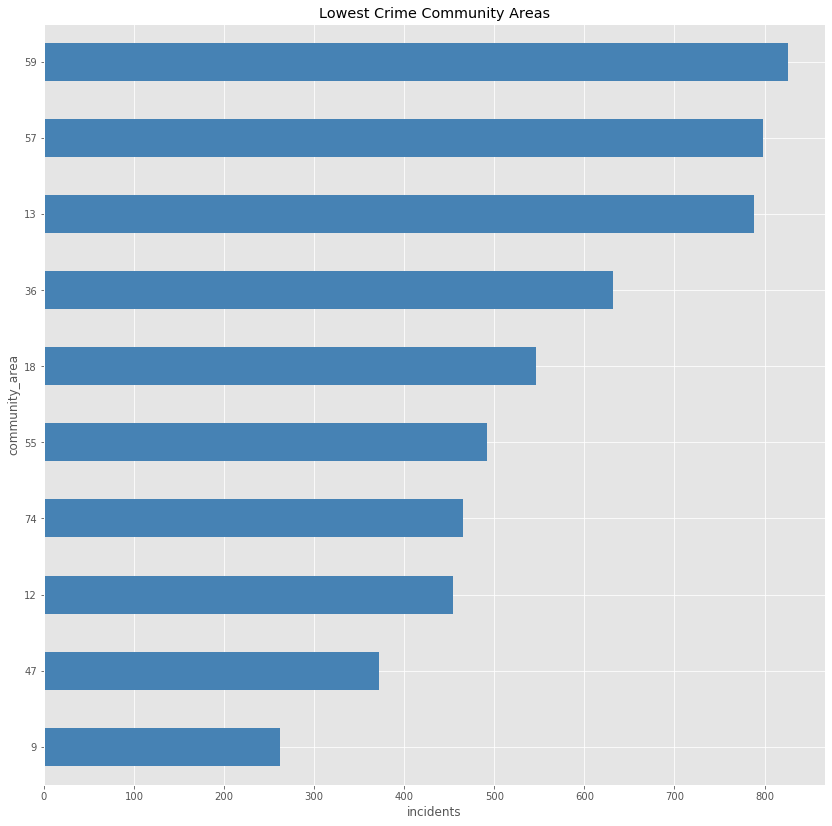

In [62]:
Bottom_10_Crime.plot(kind='barh', figsize=(14, 14), color='steelblue')
plt.xlabel('incidents') # add to x-label to the plot
plt.ylabel('community_area') # add y-label to the plot
plt.title('Lowest Crime Community Areas') # add title to the plot

#plt.show()

***

![Lowest Crime Communities](https://github.com/ezrawitt/Coursera_Capstone/blob/master/images/Lowest%20Crime%20Community%20Areas.png?raw=true "Lowest Crime Communities")

***

- #### Next let's visualize the crime incidents on the map (since the dataframe is quite large we will look at just 10% of the crimes in the visualization)

In [63]:
# to visualize the large dataset let's start with a sample (10% of total crimes)
limit = 25799
Chicago_Crime_Sample = Chicago_Crime_S.iloc[0:limit, :]

In [64]:
# let's start again with a clean copy of the map of Chicago
crime_sample_map = folium.Map(location = [latitude, longitude], zoom_start = 11)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(crime_sample_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(Chicago_Crime_Sample.latitude, Chicago_Crime_Sample.longitude, Chicago_Crime_Sample.primary_type):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)
    
folium.GeoJson(
    Chicago_gpd,
    name='geojson'
).add_to(crime_sample_map)

In [65]:
# display map
#crime_sample_map

***
Crime Sample Set Clusters <br>
![Crime Sample Set Clusters](https://github.com/ezrawitt/Coursera_Capstone/blob/master/images/10%25%20of%20Crime.png?raw=true "Crime Sample Set Clusters")

***

In [66]:
# let's start again with a clean copy of the map of Chicago
#chicago_crime_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

#instantiate a mark cluster object for the incidents in the dataframe
#incidents = plugins.MarkerCluster().add_to(chicago_crime_map)

# loop through the dataframe and add each data point to the mark cluster
#for lat, lng, label, in zip(Chicago_Crime_S.latitude, Chicago_Crime_S.longitude, Chicago_Crime_S.primary_type):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

In [67]:
# display map
#chicago_crime_map

- #### The cluster map is helpful because we can clearly see the clusters of crimes and particular areas. However, it does not give us a clear overview of how many crimes are in each community area. Let's visualize it again but instead let's see the counts for each community area.

In [68]:
#Create a map for Chicago with crime groups
Crime_Group_Map = folium.Map(location = [latitude, longitude], zoom_start = 11)

folium.GeoJson(
    Chicago_gpd,
    name='geojson'
).add_to(Crime_Group_Map)

for lat, lng, post, crime in zip(Crime_Group['latitude'], Crime_Group['longitude'], Crime_Group['community_area'], Crime_Group['incidents']):
    label = '{}: Crime: {}'.format(post, crime)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker([lat, lng], 
                        radius = 10, 
                        popup = label, 
                        color = 'yellow', 
                        fill = True,
                        fill_color='blue',
                        fill_opacity = 0.6, 
                       parse_html = False).add_to(Crime_Group_Map)

#Crime_Group_Map

***
Crime Counts by Community <br>
![Crime Counts by Community](https://github.com/ezrawitt/Coursera_Capstone/blob/master/images/Crime%20Counts%20by%20Community%20Area.png?raw=true "Crime Counts by Community")

***

## 4.4 **_Family Friendly Venues_**

- #### First we will use a hidden cell to store our credentials and the limit and radius for this portion of the project

In [69]:
# @hidden_cell
CLIENT_ID = 'UBLIN1MEZ22RBQI1RFZVWXQPNQOW0KONNQXT2WP2LJCDILJG' # your Foursquare ID
CLIENT_SECRET = 'IY51ILYZFFZPROEQCFSRGIM5NAFYSIWOOYH5MJYL5TFK2AKB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

LIMIT = 100
radius = 1609

print('Your credentails have been stored')

Your credentails have been stored


- #### Next we will define a function to loop each of our community areas through the Foursquare API and return all of the venues within a mile radius (1609 meters)

In [70]:
def getNearbyVenues(names, latitudes, longitudes, radius=radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Community Area', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

- #### Next we can call the function to run each of our community areas through the API

In [71]:
Chicago_venues = getNearbyVenues(names=Community_Areas['community'],
                                   latitudes=Community_Areas['latitude'],
                                   longitudes=Community_Areas['longitude'])

ALBANY PARK
ARCHER HEIGHTS
ARMOUR SQUARE
ASHBURN
AUBURN GRESHAM
AUSTIN
AVALON PARK
AVONDALE
BELMONT CRAGIN
BEVERLY
BRIDGEPORT
BRIGHTON PARK
BURNSIDE
CALUMET HEIGHTS
CHATHAM
CHICAGO LAWN
CLEARING
DOUGLAS
DUNNING
EAST GARFIELD PARK
EAST SIDE
EDGEWATER
EDISON PARK
ENGLEWOOD
FOREST GLEN
FULLER PARK
GAGE PARK
GARFIELD RIDGE
GRAND BOULEVARD
GREATER GRAND CROSSING
HEGEWISCH
HERMOSA
HUMBOLDT PARK
HYDE PARK
IRVING PARK
JEFFERSON PARK
KENWOOD
LAKE VIEW
LINCOLN PARK
LINCOLN SQUARE
LOGAN SQUARE
LOOP
LOWER WEST SIDE
MCKINLEY PARK
MONTCLARE
MORGAN PARK
MOUNT GREENWOOD
NEAR NORTH SIDE
NEAR SOUTH SIDE
NEAR WEST SIDE
NEW CITY
NORTH CENTER
NORTH LAWNDALE
NORTH PARK
NORWOOD PARK
OAKLAND
OHARE
PORTAGE PARK
PULLMAN
RIVERDALE
ROGERS PARK
ROSELAND
SOUTH CHICAGO
SOUTH DEERING
SOUTH LAWNDALE
SOUTH SHORE
UPTOWN
WASHINGTON HEIGHTS
WASHINGTON PARK
WEST ELSDON
WEST ENGLEWOOD
WEST GARFIELD PARK
WEST LAWN
WEST PULLMAN
WEST RIDGE
WEST TOWN
WOODLAWN


- #### Next we can examine how many unique categories there are for the dataframe and how many venues it returned for each community area (with a limit of 100)

In [72]:
print('There are {} uniques categories.'.format(len(Chicago_venues['Venue Category'].unique())))
Chicago_venues.groupby('Community Area').count()

There are 359 uniques categories.


,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Community Area,,,,,,
ALBANY PARK,100,100,100,100,100,100
ARCHER HEIGHTS,92,92,92,92,92,92
ARMOUR SQUARE,100,100,100,100,100,100
ASHBURN,65,65,65,65,65,65
AUBURN GRESHAM,55,55,55,55,55,55
...,...,...,...,...,...,...
WEST LAWN,75,75,75,75,75,75
WEST PULLMAN,30,30,30,30,30,30
WEST RIDGE,100,100,100,100,100,100


- #### Let's examine the shape of our dataframe and the first five rows

In [73]:
print(Chicago_venues.shape)
Chicago_venues.head()

(5705, 7)


,Community Area,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ALBANY PARK,41.96698,-87.719034,Lawrence Fish Market,41.968280,-87.726250,Seafood Restaurant
1,ALBANY PARK,41.96698,-87.719034,Nighthawk,41.967974,-87.713415,Cocktail Bar
2,ALBANY PARK,41.96698,-87.719034,Chicago Kalbi Korean BBQ,41.968314,-87.722771,Korean Restaurant
3,ALBANY PARK,41.96698,-87.719034,Great Sea Chinese Restaurant,41.968496,-87.710678,Chinese Restaurant
4,ALBANY PARK,41.96698,-87.719034,Starbucks,41.968911,-87.728817,Coffee Shop


- #### Since we are wanting to find out if each community is family friendly we will narrow our results to only those categories which we would consider "family friendly"

- #### I have determined the following categories and venues to be "family friendly" 

Sports and Outdoors <br>
'Gym', 'Soccer Field', 'Field', 'Athletics & Sports', 'Gym / Fitness Center', 'Football Stadium', 'Track', 'Stadium', 'College Stadium',
'Golf Course', 'Climbing Gym', 'Baseball Field', 'Tennis Court', 'Bike Rental / Bike Share', 'Recreation Center', 'Lake', 'Park', 'Playground', 'Trail',

Sweets and Treats <br>
'Donut Shop', 'Ice Cream Shop', 'Frozen Yogurt Shop', 'Cupcake Shop', 'Smoothie Shop', 'Candy Store', 'Pie Shop',

Entertainment <br>
'Movie Theater', 'Theme Park', 'Theater', 'Concert Hall', 'Bowling Alley', 'Museum', 'Video Store', 'Skating Rink', 'Toy / Game Store', 'History Museum', 
'Performing Arts Venue', 'Arcade', 'Video Game Store', 

Shopping <br>
'Shopping Plaza', 'Kids Store', 'Arts & Crafts Store', 'Bookstore', 'Shopping Mall', 'Farmers Market',

In [74]:
Family_Friendly_Venues = Chicago_venues.loc[Chicago_venues['Venue Category'].isin(['Gym', 'Soccer Field', 'Field', 'Athletics & Sports', 'Gym / Fitness Center', 'Football Stadium', 'Track', 'Stadium', 'College Stadium',
'Golf Course', 'Climbing Gym', 'Baseball Field', 'Tennis Court', 'Bike Rental / Bike Share', 'Recreation Center', 'Lake', 'Park', 'Playground', 'Trail', 'Donut Shop', 'Ice Cream Shop', 'Frozen Yogurt Shop', 'Cupcake Shop', 'Smoothie Shop', 'Candy Store', 'Pie Shop', 'Movie Theater', 'Theme Park', 'Theater', 'Concert Hall', 'Bowling Alley', 'Museum', 'Video Store', 'Skating Rink', 'Toy / Game Store', 'History Museum', 
'Performing Arts Venue', 'Arcade', 'Video Game Store', 'Shopping Plaza', 'Kids Store', 'Arts & Crafts Store', 'Bookstore', 'Shopping Mall', 'Farmers Market'])]
print(Family_Friendly_Venues.shape)
print('There are {} uniques categories.'.format(len(Family_Friendly_Venues['Venue Category'].unique())))

(817, 7)
There are 41 uniques categories.


- #### We can now see that there are 41 unique venues (defined by us) and that there are 817 family friendly venues in our dataframe <br>
- #### Now let's see how many fall within a mile of each community area

In [75]:
Family_Friendly_Venues.groupby('Community Area').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Community Area,,,,,,
ALBANY PARK,11,11,11,11,11,11
ARCHER HEIGHTS,12,12,12,12,12,12
ARMOUR SQUARE,9,9,9,9,9,9
ASHBURN,16,16,16,16,16,16
AUBURN GRESHAM,5,5,5,5,5,5
...,...,...,...,...,...,...
WEST LAWN,11,11,11,11,11,11
WEST PULLMAN,5,5,5,5,5,5
WEST RIDGE,13,13,13,13,13,13


- #### We can also categorize each venue into it's own dataframe so we can view the number of each type of family friendly venue <br>
- #### We'll start with "_Sports and Outdoors_" and view the dataframe

In [76]:
Sports_and_Outdoors = Chicago_venues.loc[Chicago_venues['Venue Category'].isin(['Gym', 'Soccer Field', 'Field', 'Athletics & Sports', 'Gym / Fitness Center', 'Football Stadium', 'Track', 'Stadium', 'College Stadium',
'Golf Course', 'Climbing Gym', 'Baseball Field', 'Tennis Court', 'Bike Rental / Bike Share', 'Recreation Center', 'Lake', 'Park', 'Playground', 'Trail'])]
print(Sports_and_Outdoors.shape)
print('There are {} uniques categories.'.format(len(Sports_and_Outdoors['Venue Category'].unique())))
Sports_and_Outdoors.head()

(392, 7)
There are 17 uniques categories.


,Community Area,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
13,ALBANY PARK,41.96698,-87.719034,Eugene Field Park,41.974274,-87.722146,Park
35,ALBANY PARK,41.96698,-87.719034,Gompers Park,41.975472,-87.734078,Park
41,ALBANY PARK,41.96698,-87.719034,River Park,41.973975,-87.702609,Park
64,ALBANY PARK,41.96698,-87.719034,Ronan Park,41.969627,-87.702085,Park
78,ALBANY PARK,41.96698,-87.719034,Ravenswood Manor Park,41.965377,-87.700778,Park


In [77]:
### Next we'll clean the dataframe and view it
Sports_and_Outdoors = Sports_and_Outdoors[['Community Area', 'Venue Category']]
Sports_and_Outdoors = Sports_and_Outdoors.rename(columns={'Venue Category':'Sports and Outdoor Venues'})
Sports_and_Outdoors

,Community Area,Sports and Outdoor Venues
13,ALBANY PARK,Park
35,ALBANY PARK,Park
41,ALBANY PARK,Park
64,ALBANY PARK,Park
78,ALBANY PARK,Park
...,...,...
5660,WOODLAWN,Gym
5678,WOODLAWN,Park
5692,WOODLAWN,Baseball Field
5697,WOODLAWN,Athletics & Sports


- #### Next we will define venues that classify as "_Sweets and Treats_" and view the dataframe

In [78]:
Sweets_and_Treats = Chicago_venues.loc[Chicago_venues['Venue Category'].isin(['Donut Shop', 'Ice Cream Shop', 'Frozen Yogurt Shop', 'Cupcake Shop', 'Smoothie Shop', 'Candy Store', 'Pie Shop'])]
print(Sweets_and_Treats.shape)
print('There are {} uniques categories.'.format(len(Sweets_and_Treats['Venue Category'].unique())))
Sweets_and_Treats.head()

(208, 7)
There are 6 uniques categories.


,Community Area,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
14,ALBANY PARK,41.96698,-87.719034,la Michoacana Premium,41.968559,-87.706510,Ice Cream Shop
38,ALBANY PARK,41.96698,-87.719034,First Slice Pie Cafe,41.966245,-87.701263,Pie Shop
59,ALBANY PARK,41.96698,-87.719034,Dunkin',41.967933,-87.729699,Donut Shop
82,ALBANY PARK,41.96698,-87.719034,Baskin-Robbins,41.967933,-87.729721,Ice Cream Shop
92,ALBANY PARK,41.96698,-87.719034,Alaska Paleteria Y Neveria,41.954109,-87.714808,Ice Cream Shop


In [79]:
### Next we'll clean the dataframe and view it
Sweets_and_Treats = Sweets_and_Treats[['Community Area', 'Venue Category']]
Sweets_and_Treats = Sweets_and_Treats.rename(columns={'Venue Category':'Sweets and Treats Venues'})
Sweets_and_Treats

,Community Area,Sweets and Treats Venues
14,ALBANY PARK,Ice Cream Shop
38,ALBANY PARK,Pie Shop
59,ALBANY PARK,Donut Shop
82,ALBANY PARK,Ice Cream Shop
92,ALBANY PARK,Ice Cream Shop
...,...,...
5554,WEST TOWN,Ice Cream Shop
5572,WEST TOWN,Ice Cream Shop
5593,WEST TOWN,Donut Shop
5614,WEST TOWN,Pie Shop


- #### Next we will define venues that classify as "_Entertainment_" and view the dataframe

In [80]:
Entertainment = Chicago_venues.loc[Chicago_venues['Venue Category'].isin(['Movie Theater', 'Theme Park', 'Theater', 'Concert Hall', 'Bowling Alley', 'Museum', 'Video Store', 'Skating Rink', 'Toy / Game Store', 'History Museum', 
'Performing Arts Venue', 'Arcade', 'Video Game Store'])]
print(Entertainment.shape)
print('There are {} uniques categories.'.format(len(Entertainment['Venue Category'].unique())))
Entertainment.head()

(159, 7)
There are 12 uniques categories.


,Community Area,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
93,ALBANY PARK,41.966980,-87.719034,Redbox,41.956034,-87.722030,Video Store
129,ARCHER HEIGHTS,41.807188,-87.726875,GameStop,41.799604,-87.722462,Video Game Store
131,ARCHER HEIGHTS,41.807188,-87.726875,Redbox,41.807635,-87.722675,Video Store
156,ARCHER HEIGHTS,41.807188,-87.726875,Redbox,41.796322,-87.724693,Video Store
297,ASHBURN,41.745978,-87.710200,Bluebird Lanes,41.737225,-87.719668,Bowling Alley


In [81]:
### Next we'll clean the dataframe and view it
Entertainment = Entertainment[['Community Area', 'Venue Category']]
Entertainment = Entertainment.rename(columns={'Venue Category':'Entertainment Venues'})
Entertainment

,Community Area,Entertainment Venues
93,ALBANY PARK,Video Store
129,ARCHER HEIGHTS,Video Game Store
131,ARCHER HEIGHTS,Video Store
156,ARCHER HEIGHTS,Video Store
297,ASHBURN,Bowling Alley
...,...,...
5563,WEST TOWN,Theater
5644,WOODLAWN,History Museum
5649,WOODLAWN,History Museum
5651,WOODLAWN,History Museum


- #### Next we will define venues that classify as "_Shopping_" and view the dataframe

In [82]:
Shopping = Chicago_venues.loc[Chicago_venues['Venue Category'].isin(['Shopping Plaza', 'Kids Store', 'Arts & Crafts Store', 'Bookstore', 'Shopping Mall', 'Farmers Market'])]
print(Shopping.shape)
print('There are {} uniques categories.'.format(len(Shopping['Venue Category'].unique())))
Shopping.head()

(58, 7)
There are 6 uniques categories.


,Community Area,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
121,ARCHER HEIGHTS,41.807188,-87.726875,Michaels,41.817904,-87.725691,Arts & Crafts Store
179,ARCHER HEIGHTS,41.807188,-87.726875,Powell’s Books Warehouse,41.807486,-87.710638,Bookstore
559,AVONDALE,41.938026,-87.713517,Logan Square Farmers Market,41.928251,-87.704800,Farmers Market
563,AVONDALE,41.938026,-87.713517,City Lit,41.927204,-87.706951,Bookstore
712,BEVERLY,41.713110,-87.672641,Bookie's - New & Used Books,41.706155,-87.682571,Bookstore


In [83]:
### Next we'll clean the dataframe and view it
Shopping = Shopping[['Community Area', 'Venue Category']]
Shopping = Shopping.rename(columns={'Venue Category':'Shopping Venues'})
Shopping

,Community Area,Shopping Venues
121,ARCHER HEIGHTS,Arts & Crafts Store
179,ARCHER HEIGHTS,Bookstore
559,AVONDALE,Farmers Market
563,AVONDALE,Bookstore
712,BEVERLY,Bookstore
723,BEVERLY,Arts & Crafts Store
1004,BURNSIDE,Kids Store
1152,CHATHAM,Kids Store
1213,CHATHAM,Shopping Mall
1395,DOUGLAS,Shopping Mall


- #### Next we'll use one hot encoding to allow the categorical data to be more implicit for machine learning

In [84]:
# one hot encoding
Chicago_onehot = pd.get_dummies(Family_Friendly_Venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Chicago_onehot['Community Area'] = Family_Friendly_Venues['Community Area'] 

# move neighborhood column to the first column
fixed_columns = [Chicago_onehot.columns[-1]] + list(Chicago_onehot.columns[:-1])
Chicago_onehot = Chicago_onehot[fixed_columns]

Chicago_onehot.head()

,Community Area,Arcade,Arts & Crafts Store,Athletics & Sports,Baseball Field,Bike Rental / Bike Share,Bookstore,Bowling Alley,Candy Store,Climbing Gym,...,Skating Rink,Soccer Field,Stadium,Tennis Court,Theater,Toy / Game Store,Track,Trail,Video Game Store,Video Store
13,ALBANY PARK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,ALBANY PARK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,ALBANY PARK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,ALBANY PARK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,ALBANY PARK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
Chicago_grouped = Chicago_onehot.groupby('Community Area').mean().reset_index()
Chicago_grouped

,Community Area,Arcade,Arts & Crafts Store,Athletics & Sports,Baseball Field,Bike Rental / Bike Share,Bookstore,Bowling Alley,Candy Store,Climbing Gym,...,Skating Rink,Soccer Field,Stadium,Tennis Court,Theater,Toy / Game Store,Track,Trail,Video Game Store,Video Store
0,ALBANY PARK,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.090909
1,ARCHER HEIGHTS,0.0,0.083333,0.000000,0.000000,0.0,0.083333,0.000000,0.083333,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.083333,0.166667
2,ARMOUR SQUARE,0.0,0.000000,0.111111,0.000000,0.0,0.000000,0.000000,0.111111,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.000000
3,ASHBURN,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.062500,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0625,0.000000,0.062500
4,AUBURN GRESHAM,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,WEST LAWN,0.0,0.000000,0.090909,0.090909,0.0,0.000000,0.090909,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.000000
73,WEST PULLMAN,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.200000,0.000000
74,WEST RIDGE,0.0,0.000000,0.000000,0.000000,0.0,0.076923,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.230769
75,WEST TOWN,0.0,0.100000,0.000000,0.000000,0.0,0.100000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.1,0.0,0.0,0.0000,0.000000,0.000000


- #### We can next create a function to find the top venues for each community area and view the first 5 rows to see the top ten venues

In [86]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [87]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Community Area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Chicago_venues_sorted = pd.DataFrame(columns=columns)
Chicago_venues_sorted['Community Area'] = Chicago_grouped['Community Area']

for ind in np.arange(Chicago_grouped.shape[0]):
    Chicago_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Chicago_grouped.iloc[ind, :], num_top_venues)

Chicago_venues_sorted.head()

,Community Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ALBANY PARK,Park,Ice Cream Shop,Pie Shop,Donut Shop,Video Store,Theater,Tennis Court,Frozen Yogurt Shop,Football Stadium,Field
1,ARCHER HEIGHTS,Donut Shop,Video Store,Park,Bookstore,Gym / Fitness Center,Candy Store,Video Game Store,Arts & Crafts Store,Bowling Alley,Bike Rental / Bike Share
2,ARMOUR SQUARE,Park,Gym / Fitness Center,Candy Store,Gym,Ice Cream Shop,Athletics & Sports,Bike Rental / Bike Share,Bookstore,Bowling Alley,Baseball Field
3,ASHBURN,Park,Ice Cream Shop,Donut Shop,Bowling Alley,Gym,Video Store,Trail,Tennis Court,Climbing Gym,Football Stadium
4,AUBURN GRESHAM,Park,Video Store,Donut Shop,Cupcake Shop,Gym,Golf Course,Frozen Yogurt Shop,Football Stadium,Field,Farmers Market


## 4.5 **_K-Means Analysis_**

- #### We can now use the K-means clustering algorithm to see the machines method of clustering our community areas. 

In [88]:
kclusters = 3

Chicago_grouped_clustering = Chicago_grouped.drop('Community Area', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Chicago_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 2, 0, 0, 0, 1, 2, 1, 1], dtype=int32)

- #### Now that the machine has calculated the array we can assign the labels to our dataframe

In [89]:
# add clustering labels
Chicago_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Chicago_merged = Community_Areas[['latitude', 'longitude', 'community']]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Chicago_merged = Chicago_merged.join(Chicago_venues_sorted).dropna()
Chicago_merged = Chicago_merged.sort_values('community')
Chicago_merged.head() # check the last columns!

,latitude,longitude,community,Cluster Labels,Community Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,41.966980,-87.719034,ALBANY PARK,0,ALBANY PARK,Park,Ice Cream Shop,Pie Shop,Donut Shop,Video Store,Theater,Tennis Court,Frozen Yogurt Shop,Football Stadium,Field
1,41.807188,-87.726875,ARCHER HEIGHTS,1,ARCHER HEIGHTS,Donut Shop,Video Store,Park,Bookstore,Gym / Fitness Center,Candy Store,Video Game Store,Arts & Crafts Store,Bowling Alley,Bike Rental / Bike Share
2,41.842066,-87.633271,ARMOUR SQUARE,2,ARMOUR SQUARE,Park,Gym / Fitness Center,Candy Store,Gym,Ice Cream Shop,Athletics & Sports,Bike Rental / Bike Share,Bookstore,Bowling Alley,Baseball Field
3,41.745978,-87.710200,ASHBURN,0,ASHBURN,Park,Ice Cream Shop,Donut Shop,Bowling Alley,Gym,Video Store,Trail,Tennis Court,Climbing Gym,Football Stadium
4,41.746322,-87.655224,AUBURN GRESHAM,0,AUBURN GRESHAM,Park,Video Store,Donut Shop,Cupcake Shop,Gym,Golf Course,Frozen Yogurt Shop,Football Stadium,Field,Farmers Market


- #### Now let's view the clusters on the map

In [90]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

folium.GeoJson(
    Chicago_gpd,
    name='geojson'
).add_to(map_clusters)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Chicago_merged['latitude'], Chicago_merged['longitude'], Chicago_merged['Community Area'], Chicago_merged['Cluster Labels']):
    label = folium.Popup('{} - Cluster {}'.format(poi, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color = rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
    
#map_clusters

***
Family Friendly KMeans Clusters <br>
![Family Friendly Clusters](https://github.com/ezrawitt/Coursera_Capstone/blob/master/images/Updated%20Family%20Friendly%20Venues%20by%20Community%20Area.png?raw=true "Family Friendly Clusters")

***

- #### We can now view each cluster and the most common venues. If we were only looking at this data we could then find the preference area and select. Since we are examine other factors as well we will analyze these results at the end with our discussion.

## _**K_Means Cluster 1**_

In [91]:
Chicago_merged.loc[Chicago_merged['Cluster Labels'] == 0, Chicago_merged.columns[[4] + list(range(5, Chicago_merged.shape[1]))]]

,Community Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ALBANY PARK,Park,Ice Cream Shop,Pie Shop,Donut Shop,Video Store,Theater,Tennis Court,Frozen Yogurt Shop,Football Stadium,Field
3,ASHBURN,Park,Ice Cream Shop,Donut Shop,Bowling Alley,Gym,Video Store,Trail,Tennis Court,Climbing Gym,Football Stadium
4,AUBURN GRESHAM,Park,Video Store,Donut Shop,Cupcake Shop,Gym,Golf Course,Frozen Yogurt Shop,Football Stadium,Field,Farmers Market
5,AUSTIN,Park,Donut Shop,Athletics & Sports,Video Store,Cupcake Shop,Gym,Golf Course,Frozen Yogurt Shop,Football Stadium,Field
15,CHICAGO LAWN,Park,Donut Shop,Soccer Field,Video Store,Concert Hall,Golf Course,Frozen Yogurt Shop,Football Stadium,Field,Farmers Market
17,DOUGLAS,Park,Gym / Fitness Center,Video Store,Shopping Mall,Bike Rental / Bike Share,Donut Shop,Ice Cream Shop,Trail,Stadium,Climbing Gym
19,EAST GARFIELD PARK,Park,Baseball Field,Video Store,Cupcake Shop,Gym,Golf Course,Frozen Yogurt Shop,Football Stadium,Field,Farmers Market
23,ENGLEWOOD,Park,Shopping Plaza,Bookstore,Donut Shop,Concert Hall,Golf Course,Frozen Yogurt Shop,Football Stadium,Field,Farmers Market
25,FULLER PARK,Park,Donut Shop,Video Game Store,Performing Arts Venue,Video Store,Gym / Fitness Center,Golf Course,Frozen Yogurt Shop,Football Stadium,Field
27,GARFIELD RIDGE,Park,Gym / Fitness Center,Donut Shop,Cupcake Shop,Gym,Golf Course,Frozen Yogurt Shop,Football Stadium,Field,Farmers Market


## _**K_Means Cluster 2**_

In [92]:
Chicago_merged.loc[Chicago_merged['Cluster Labels'] == 1, Chicago_merged.columns[[4] + list(range(5, Chicago_merged.shape[1]))]]

,Community Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,ARCHER HEIGHTS,Donut Shop,Video Store,Park,Bookstore,Gym / Fitness Center,Candy Store,Video Game Store,Arts & Crafts Store,Bowling Alley,Bike Rental / Bike Share
6,AVALON PARK,Donut Shop,Park,Video Store,Theater,Athletics & Sports,Ice Cream Shop,Tennis Court,Climbing Gym,Football Stadium,Field
8,BELMONT CRAGIN,Donut Shop,Ice Cream Shop,Park,Athletics & Sports,Field,Gym,Video Store,Stadium,Climbing Gym,Football Stadium
9,BEVERLY,Donut Shop,Ice Cream Shop,Park,Arts & Crafts Store,Bookstore,Video Game Store,Video Store,Stadium,Climbing Gym,Football Stadium
10,BRIDGEPORT,Park,Video Store,Donut Shop,Video Game Store,Ice Cream Shop,Theater,Tennis Court,Frozen Yogurt Shop,Football Stadium,Field
11,BRIGHTON PARK,Park,Donut Shop,Video Store,Ice Cream Shop,Gym / Fitness Center,Athletics & Sports,Concert Hall,Frozen Yogurt Shop,Football Stadium,Field
12,BURNSIDE,Ice Cream Shop,Park,Donut Shop,Video Game Store,Video Store,Athletics & Sports,Kids Store,Theater,Concert Hall,Football Stadium
13,CALUMET HEIGHTS,Park,Video Store,Donut Shop,Video Game Store,Ice Cream Shop,Theater,Tennis Court,Frozen Yogurt Shop,Football Stadium,Field
14,CHATHAM,Donut Shop,Video Game Store,Gym / Fitness Center,Park,Video Store,Shopping Mall,Athletics & Sports,Kids Store,Movie Theater,Ice Cream Shop
16,CLEARING,Video Store,Park,Donut Shop,Playground,Cupcake Shop,Golf Course,Frozen Yogurt Shop,Football Stadium,Field,Farmers Market


## _**K_Means Cluster 3**_

In [93]:
Chicago_merged.loc[Chicago_merged['Cluster Labels'] == 2, Chicago_merged.columns[[4] + list(range(5, Chicago_merged.shape[1]))]]

,Community Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,ARMOUR SQUARE,Park,Gym / Fitness Center,Candy Store,Gym,Ice Cream Shop,Athletics & Sports,Bike Rental / Bike Share,Bookstore,Bowling Alley,Baseball Field
7,AVONDALE,Park,Concert Hall,Playground,Bookstore,Farmers Market,Climbing Gym,Gym / Fitness Center,Golf Course,Frozen Yogurt Shop,Football Stadium
21,EDGEWATER,Gym,Park,Ice Cream Shop,Pie Shop,Trail,Theater,Gym / Fitness Center,History Museum,Bookstore,Frozen Yogurt Shop
22,EDISON PARK,Park,Ice Cream Shop,Donut Shop,Frozen Yogurt Shop,Gym,Gym / Fitness Center,Arcade,Toy / Game Store,Theater,Stadium
24,FOREST GLEN,Park,Trail,Golf Course,Ice Cream Shop,Playground,Frozen Yogurt Shop,Farmers Market,Gym,Bowling Alley,Candy Store
33,HYDE PARK,Bookstore,Park,History Museum,Ice Cream Shop,Gym / Fitness Center,Movie Theater,Museum,Gym,Tennis Court,Theater
34,IRVING PARK,Theater,Park,Ice Cream Shop,Donut Shop,Concert Hall,Climbing Gym,Gym,Bike Rental / Bike Share,Bookstore,Bowling Alley
36,KENWOOD,Park,Performing Arts Venue,Ice Cream Shop,Tennis Court,Gym / Fitness Center,Gym,Baseball Field,Arts & Crafts Store,Bike Rental / Bike Share,Bookstore
37,LAKE VIEW,Gym,Ice Cream Shop,Donut Shop,Theater,Bookstore,Arts & Crafts Store,Candy Store,Golf Course,Frozen Yogurt Shop,Football Stadium
38,LINCOLN PARK,Park,Gym / Fitness Center,Ice Cream Shop,Theater,Cupcake Shop,Gym,Donut Shop,Lake,Bike Rental / Bike Share,Bookstore


- #### Let's now example the number of venues in each catergory we defined earlier and combine the dataframe to view the results

In [94]:
Most_SandO = Sports_and_Outdoors.groupby('Community Area').count().reset_index()
print(Most_SandO.head())
Most_SandT = Sweets_and_Treats.groupby('Community Area').count().reset_index()
print(Most_SandT.head())
Most_E = Entertainment.groupby('Community Area').count().reset_index()
print(Most_E.head())
Most_S = Shopping.groupby('Community Area').count().reset_index()
print(Most_S.head())

   Community Area  Sports and Outdoor Venues
0     ALBANY PARK                          5
1  ARCHER HEIGHTS                          3
2   ARMOUR SQUARE                          7
3         ASHBURN                          9
4  AUBURN GRESHAM                          3
   Community Area  Sweets and Treats Venues
0     ALBANY PARK                         5
1  ARCHER HEIGHTS                         4
2   ARMOUR SQUARE                         2
3         ASHBURN                         5
4  AUBURN GRESHAM                         1
   Community Area  Entertainment Venues
0     ALBANY PARK                     1
1  ARCHER HEIGHTS                     3
2         ASHBURN                     2
3  AUBURN GRESHAM                     1
4     AVALON PARK                     2
   Community Area  Shopping Venues
0  ARCHER HEIGHTS                2
1        AVONDALE                2
2         BEVERLY                2
3        BURNSIDE                1
4         CHATHAM                2


In [95]:
Most_Family_Friendly = Most_SandO.set_index('Community Area').join(Most_SandT.set_index('Community Area')).reset_index()
Most_Family_Friendly = Most_Family_Friendly.set_index('Community Area').join(Most_E.set_index('Community Area')).reset_index()
Most_Family_Friendly = Most_Family_Friendly.set_index('Community Area').join(Most_S.set_index('Community Area')).reset_index()
Most_Family_Friendly

,Community Area,Sports and Outdoor Venues,Sweets and Treats Venues,Entertainment Venues,Shopping Venues
0,ALBANY PARK,5,5.0,1.0,NaN
1,ARCHER HEIGHTS,3,4.0,3.0,2.0
2,ARMOUR SQUARE,7,2.0,NaN,NaN
3,ASHBURN,9,5.0,2.0,NaN
4,AUBURN GRESHAM,3,1.0,1.0,NaN
...,...,...,...,...,...
72,WEST LAWN,3,5.0,3.0,NaN
73,WEST PULLMAN,3,1.0,1.0,NaN
74,WEST RIDGE,6,3.0,3.0,1.0
75,WEST TOWN,3,4.0,1.0,2.0


## 4.6 **_Family Friendly Venues Analysis_**

- #### We can now find the total family friendly venues in each community area while preserving the breakdown of each type of venues

In [96]:
Most_Family_Friendly['Total'] = Most_Family_Friendly.sum(axis=1)
Most_Family_Friendly

,Community Area,Sports and Outdoor Venues,Sweets and Treats Venues,Entertainment Venues,Shopping Venues,Total
0,ALBANY PARK,5,5.0,1.0,NaN,11.0
1,ARCHER HEIGHTS,3,4.0,3.0,2.0,12.0
2,ARMOUR SQUARE,7,2.0,NaN,NaN,9.0
3,ASHBURN,9,5.0,2.0,NaN,16.0
4,AUBURN GRESHAM,3,1.0,1.0,NaN,5.0
...,...,...,...,...,...,...
72,WEST LAWN,3,5.0,3.0,NaN,11.0
73,WEST PULLMAN,3,1.0,1.0,NaN,5.0
74,WEST RIDGE,6,3.0,3.0,1.0,13.0
75,WEST TOWN,3,4.0,1.0,2.0,10.0


- #### By sorting we can now look at the 10 community areas with the most family friendly venues

In [97]:
Most_Family_Friendly.sort_values(['Total'], ascending=False, axis=0, inplace=True)
Top_10_Family = Most_Family_Friendly.head(10)
Top_10_Family.set_index('Community Area', inplace=True)
Top_10_Family

,Sports and Outdoor Venues,Sweets and Treats Venues,Entertainment Venues,Shopping Venues,Total
Community Area,,,,,
LOOP,11,3.0,9.0,3.0,26.0
HYDE PARK,8,1.0,6.0,6.0,21.0
DOUGLAS,13,2.0,1.0,1.0,17.0
WEST ELSDON,4,8.0,5.0,NaN,17.0
NEAR SOUTH SIDE,14,NaN,3.0,NaN,17.0
LOGAN SQUARE,8,5.0,2.0,2.0,17.0
CHATHAM,5,5.0,5.0,2.0,17.0
LINCOLN PARK,9,5.0,2.0,NaN,16.0
ASHBURN,9,5.0,2.0,NaN,16.0


- #### Now let's view the top ten with each category in a horizontal bar chart by community area

Text(0.5, 1.0, 'Most Family Friendly Communities')

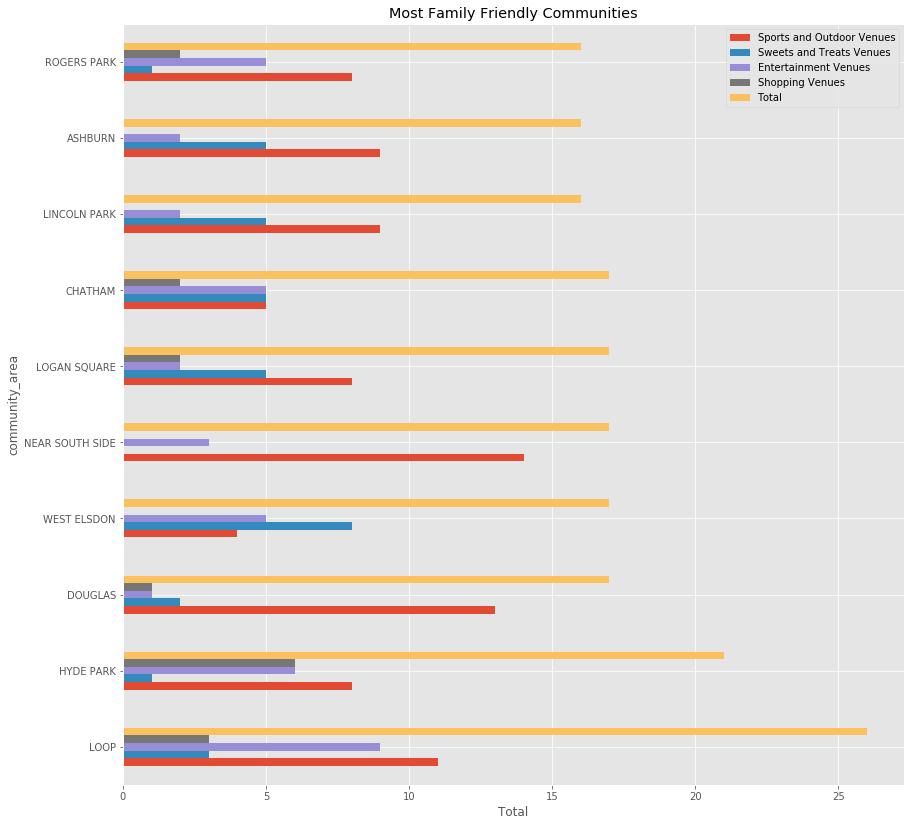

In [98]:
Top_10_Family.plot(kind='barh', figsize=(14, 14))

plt.xlabel('Total') # add to x-label to the plot
plt.ylabel('community_area') # add y-label to the plot
plt.title('Most Family Friendly Communities') # add title to the plot

#plt.show()

***

![Most Family Friendly Communities](https://github.com/ezrawitt/Coursera_Capstone/blob/master/images/Updated%20Most%20Family%20Friendly%20Communities.png?raw=true "Most Family Friendly Communities")

***

- #### We will now take the bottom ten venues and view the data in a bar chart as well.

In [99]:
Bottom_10_Family = Most_Family_Friendly.tail(10)
Bottom_10_Family

,Community Area,Sports and Outdoor Venues,Sweets and Treats Venues,Entertainment Venues,Shopping Venues,Total
50,NEW CITY,2,2.0,1.0,NaN,5.0
52,NORTH LAWNDALE,4,1.0,NaN,NaN,5.0
5,AUSTIN,3,2.0,NaN,NaN,5.0
62,SOUTH CHICAGO,3,2.0,NaN,NaN,5.0
70,WEST ENGLEWOOD,1,2.0,1.0,NaN,4.0
27,GARFIELD RIDGE,3,1.0,NaN,NaN,4.0
20,EAST SIDE,3,1.0,NaN,NaN,4.0
29,GREATER GRAND CROSSING,1,1.0,1.0,NaN,3.0
30,HEGEWISCH,2,NaN,NaN,NaN,2.0
59,RIVERDALE,1,NaN,NaN,NaN,1.0


Text(0.5, 1.0, 'Least Family Friendly Communities')

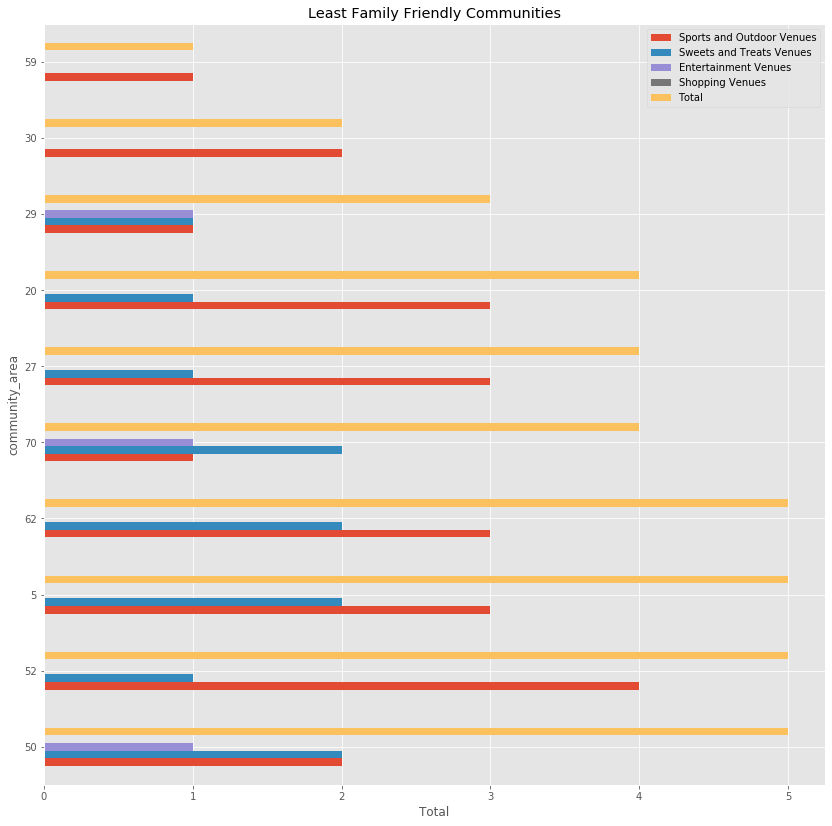

In [100]:
Bottom_10_Family.plot(kind='barh', figsize=(14, 14))

plt.xlabel('Total') # add to x-label to the plot
plt.ylabel('community_area') # add y-label to the plot
plt.title('Least Family Friendly Communities') # add title to the plot

#plt.show()

***

![Least Family Friendly Communities](https://github.com/ezrawitt/Coursera_Capstone/blob/master/images/Updated%20Least%20Family%20Friendly%20Communities.png?raw=true "Least Family Friendly Communities")

***

- #### Next let's prepare the data and add it to our dataframe

In [101]:
Add_Venues = Family_Friendly_Venues.set_index('Community Area').join(JOIN.set_index('community')).reset_index()
Add_Venues['Total']=1
Add_Venues = Add_Venues[['objectid', 'Total']]
Add_Venues = Add_Venues.rename(columns={'objectid':'community ID'})
Add_Venues = Add_Venues.rename(columns={'Total':'Family Friendly Venues'})
Add_Venues = Add_Venues.groupby(['community ID'],as_index = False).agg({'Family Friendly Venues':'sum'})
Add_Venues.head()

,community ID,Family Friendly Venues
0,1,16
1,2,13
2,3,12
3,4,14
4,5,15


In [102]:
### Add Venues to Dataframe
Recommended_Community_Areas = Recommended_Community_Areas.join(Add_Venues.set_index('community ID'))

## We can now view our _final dataframe_ with the number of _**top schools**_, _**crime**_, and _**family friendly venues**_.

In [103]:
Recommended_Community_Areas.head(15)

,area_numbe,community,Level 1+ Schools,Crime Incidents,Family Friendly Venues
community ID,,,,,
1,1,ROGERS PARK,1.0,3999,16
2,2,WEST RIDGE,4.0,3423,13
3,3,UPTOWN,1.0,3302,12
4,4,LINCOLN SQUARE,1.0,1773,14
5,5,NORTH CENTER,9.0,1247,15
6,6,LAKE VIEW,NaN,5892,15
7,7,LINCOLN PARK,1.0,4233,16
8,8,NEAR NORTH SIDE,1.0,12441,12
9,9,EDISON PARK,2.0,262,13


## 3.8 **_Final Analysis_**

- #### We can now view our final dataframe with our three indicators included in the set for analysis. We will now use the describe attribute to find the mean (average) of each of the three indicators.

In [104]:
print(Recommended_Community_Areas.shape)
Recommended_Community_Areas.describe()

(77, 5)


,area_numbe,Level 1+ Schools,Crime Incidents,Family Friendly Venues
count,77.000000,46.000000,77.000000,77.000000
mean,39.000000,3.195652,3350.506494,10.610390
std,22.371857,1.881129,2978.870360,4.779771
min,1.000000,1.000000,262.000000,1.000000
25%,20.000000,2.000000,1247.000000,7.000000
50%,39.000000,3.000000,2211.000000,11.000000
75%,58.000000,4.000000,4420.000000,14.000000
max,77.000000,9.000000,14661.000000,26.000000


- #### First we will drop any community areas that do not have any top schools (Level 1+)

In [105]:
Recommended_Community_Areas.dropna(subset=["Level 1+ Schools"], axis=0, inplace=True)
Recommended_Community_Areas.shape

(46, 5)

- #### That now leaves us with 46 potential communities. Using our describe data above we will now only keep those that have above average Level 1+ Schools.

In [106]:
Recommended_Community_Areas = Recommended_Community_Areas[Recommended_Community_Areas['Level 1+ Schools'] >= 3.20]
Recommended_Community_Areas.shape

(16, 5)

- #### There are now 16 communities that contain above average number of Level 1+ schools. Next we will take the average crimes by community and only keep the communities that have below average crime incidents.

In [107]:
Recommended_Community_Areas = Recommended_Community_Areas[Recommended_Community_Areas['Crime Incidents'] <= 3350.46]
Recommended_Community_Areas.shape

(9, 5)

- #### We now have 9 communities that have below average crime and above average number of Level 1+ rated schools. 
<br>
- #### Next we will take our remaining communities and only keep those that have an above average number of family friendly venues (more than 10)

In [108]:
Recommended_Community_Areas = Recommended_Community_Areas[Recommended_Community_Areas['Family Friendly Venues'] >= 10.44]
Recommended_Community_Areas.shape

(4, 5)

- #### We are now left with 4 communities to recommend that have below average crime, above average Level 1+ rated schools, and above average family friendly venues. Let's view our remaining communities and the number of each of our indicators

In [109]:
Recommended_Community_Areas

,area_numbe,community,Level 1+ Schools,Crime Incidents,Family Friendly Venues
community ID,,,,,
5,5,NORTH CENTER,9.0,1247,15
33,33,NEAR SOUTH SIDE,4.0,1834,17
36,36,OAKLAND,5.0,632,11
58,58,BRIGHTON PARK,5.0,2211,12


- #### Next let's view each of our remaining communities on the map. *We will first have to add back in the latitude and longitude of each of these areas.

In [110]:
Map_Recommended = Recommended_Community_Areas.set_index('community').join(Community_Areas.set_index('community')).reset_index()
Map_Recommended

,community,area_numbe,Level 1+ Schools,Crime Incidents,Family Friendly Venues,latitude,longitude
0,NORTH CENTER,5,9.0,1247,15,41.947599,-87.682797
1,NEAR SOUTH SIDE,33,4.0,1834,17,41.858176,-87.623499
2,OAKLAND,36,5.0,632,11,41.824187,-87.606080
3,BRIGHTON PARK,58,5.0,2211,12,41.816231,-87.696157


In [111]:
recommended_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# instantiate a feature group for the community areas in the dataframe
community = folium.map.FeatureGroup()

# loop through the recommended areas and add each to the feature group
for lat, lng, in zip(Map_Recommended.latitude, Map_Recommended.longitude):
    community.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(Map_Recommended.latitude)
longitudes = list(Map_Recommended.longitude)
labels = list(Map_Recommended.community)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(recommended_map) 

folium.GeoJson(
    Chicago_gpd,
    name='geojson'
).add_to(recommended_map)
    
# add incidents to map
#recommended_map.add_child(community)

***

Recommended Community Areas <br>
![Recommended Community Areas](https://github.com/ezrawitt/Coursera_Capstone/blob/master/images/Recommended%20Map.png?raw=true "Recommended Community Areas")

***

***
<a id="results"> </a>

# `5. Results and Discussion`

***

Through our analysis, we are now able to suggest four different community areas to our prospective family. Having four final results allows for a little more personalization for our family and the opportunity to choose the location that is ideal for them. Presenting the information below would also allow our family to prioritize which of the measures we took is most important. For example, if crime is most important than they may lean towards Oakland who had the lowest crime counts of our final four results; or if schools are most important than the family may choose North Center who has by far the most Level 1+ rated schools in our final four.

In [112]:
Recommended_Community_Areas

,area_numbe,community,Level 1+ Schools,Crime Incidents,Family Friendly Venues
community ID,,,,,
5,5,NORTH CENTER,9.0,1247,15
33,33,NEAR SOUTH SIDE,4.0,1834,17
36,36,OAKLAND,5.0,632,11
58,58,BRIGHTON PARK,5.0,2211,12


Using K-Means we were able to sort the communities into three clusters based on the types of venues returned in the sets. Two of our final recommendations, Near South Side and Brighten Park, landed in the first cluster. The other two community areas, North Center and Oakland, landed in the second cluster. This method of classification could also be tailored to meet the personality types or personal styles of potential families. 

Through our analysis of the Foursquare API we were able to identify 40 categories we deemed "_Family Friendly_". We were not able to identify specific restaurants based on categories because the Foursquare API does not distinguish through the standard search which might be family friendly and which may be fine dining for each category. 

Overall, being able to find four community areas that are better than the average in all three categories is ideal because it allows for some flexibility and control from the prospective family to have an element of choice in the process.

***
<a id="conclusion"> </a>

# `6. Conclusion and Further Study`

***

The results of the study are beneficial but not all encompassing. Further personalization would likely be needed to determine the best fit, for example, if our family does not consider some of the venues we choose to be family friendly it may have resulted in all things not being considered equal. However, the idea and exploratory of this project could still be found useful to some. 

Without the ability to truly test the results it leaves something to be desired, additionally the small scope of this project leaves room for improvement. These are a few of the areas that could be improved upon before using this as a full scale model.

- While these four community areas fit the three criteria we laid out, other factors, such as housing costs, types of housing in those areas, and family budgets could alter the results.
- Extending the crime scope to beyond one years data would be necessary for a project of this nature. While the 2019 data gives us an idea, using a larger dataframe with a range of years could allow us to predict up and coming family friendly community areas. This would also eliminate any possible irregularities in the data from an unusual year in a trend.
- Expanding the data to use Level 1 schools in addition to the Level 1+ schools could be necessary. I am not clear on all of the differences between a level 1 and level 1+ school but some families may prefer we leave those schools in the model.

I enjoyed working on this project and hope you find it interesting in the least. If you have experience/live in Chicago I would be interested to hear your feedback on these community areas (while they all meet better than average on our three conditions public perception and other factors may tell an alternative point of view.